<a href="https://colab.research.google.com/github/guebin/DL2024/blob/main/posts/08wk-1-2.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# 1. 강의영상 

{{<video https://youtu.be/playlist?list=PLQqh36zP38-xfh-AQQI0B_GONOjgj9DCi&si=uWImDc1bYBoNqCB_ >}}

# 2. Imports

In [4]:
import torch 
import torchvision
import fastai.vision.all 
import matplotlib.pyplot as plt 

# 3. GAN [@goodfellow2014generative] intro

`-` 저자: 이안굿펠로우 

- 천재임 
- 지도교수가 요수아 벤지오 

`-` 저는 아래의 논문 읽고 소름돋았어요.. 

- https://arxiv.org/abs/1406.2661 (2021-09, 38751회 인용.. $\to$ 2022-09, 48978회 인용.. $\to$ 2024-03, 66609 인용..)

`-` 최근 10년간 머신러닝 분야에서 가장 혁신적인 아이디어이다. (얀르쿤, 2014년 시점..) 

`-` 무슨내용? 생성모형 

## A. 생성모형이란? (쉬운 설명)

> 만들수 없다면 이해하지 못한 것이다, 리처드 파인만 (천재 물리학자) 

`-` 사진속에 들어있는 동물이 개인지 고양이인지 맞출수 있는 기계와 개와 고양이를 그릴수 있는 기계중 어떤것이 더 시각적보에 대한 이해가 깊다고 볼 수 있는가? 

`-` 진정으로 인공지능이 이미지자료를 이해했다면, 이미지를 만들수도 있어야 한다. $\to$ 이미지를 생성하는 모형을 만들어보자 $\to$ 성공 

![](https://upload.wikimedia.org/wikipedia/commons/1/1f/Woman_1.jpg){width=70%}

## B. GAN의 응용분야

`-` 내가 찍은 사진이 피카소의 화풍으로 표현된다면?

`-` 퀸의 라이브에이드가 4k로 나온다면?

`-` 1920년대 서울의 모습이 칼라로 복원된다면? 

`-` 딥페이크: 유명인의 가짜 포르노, 가짜뉴스, 협박(거짓기소) 


`-` 거북이의 커버.. 

`-` 너무 많아요.....

## C. 생성모형이란? 통계학과 버전의 설명 

> 제한된 정보만으로 어떤 문제를 풀 때, 그 과정에서 원래의 문제보다 일반적인 문제를 풀지 말고 (=문제를 괜히 어렵게 만들어서 풀지 말고), 가능한 원래의 문제를 직접 풀어야한다. 배프닉 (SVM 창시자) 

`-` 이미지 $\boldsymbol{X}$ 가 주어졌을 경우 라벨을 $y$ 라고 하자. 

`-` 이미지를 보고 라벨을 맞추는 일은 $p(y| \boldsymbol{X})$에 관심이 있다. -- 판별모형

`-` 이미지를 생성하는 일은 $p(\boldsymbol{X},y)$에 관심이 있는것이다. -- 생성모형

`-` 데이터의 생성확률 $p(\boldsymbol{X},y)$을 알면 클래스의 사후확률 $p(y|\boldsymbol{X})$를 알 수 있음. (아래의 수식 참고) 하지만 역은 불가능 

$$p(y|{\boldsymbol X}) = \frac{p({\boldsymbol X},y)}{p({\boldsymbol X})} = \frac{p({\boldsymbol X},y)}{\sum_{y}p({\boldsymbol X},y)}$$

- 즉 이미지를 생성하는일은 분류문제보다 더 어려운 일이라 해석가능 

`-` 따라서 배프닉의 원리에 의하면 일반적인 분류문제를 해결할때 "판별모형이 생성모형보다 더 바람직한 접근법"이라 할 수 있음. 즉 개와 고양이를 구분할 때, 그려진 개와 고양이 사진을 잘 구분하면 되는 것이지 굳이 개와 고양이를 그릴줄 알아야하는건 아니라는 의미. 

`-` 예전에는 머신러닝의 응용분야가 "분류/회귀"에 한정된 느낌이었는데 요즘은 생성모형도 인기있음. 

## D. GAN의 원리

`-` GAN은 생성모형 중 하나임 

`-` GAN의 원리는 경찰과 위조지폐범이 서로 선의의(?) 경쟁을 통하여 서로 발전하는 모형으로 설명할 수 있다.

> The generative model can be thought of as analogous to a team of fakers,
trying to produce fake currency and use it without detection, while the discriminative model is
analogous to the police, trying to detect the counterfeit currency. Competition in this game drives
both teams to improve their methods until the counterfeits are indistiguishable from the genuine
articles.

`-` 서로 적대적인(adversarial) 네트워크(network)를 동시에 학습시켜 가짜이미지를 만든다(generate) 

`-` 무식한 상황극.. 

- 위조범: 가짜돈을 만들어서 부자가 되어야지! (가짜돈을 그림) 
- 경찰: (위조범이 만든 돈을 보고) 이건 가짜다! 
- 위조범: 걸렸군.. 더 정교하게 만들어야지.. 
- 경찰: 이건 진짠가?... --> 상사에게 혼남. 그것도 구분못하냐고 --> (판별능력 업그레이드) --> 이건 가짜다!! 
- 위조범: 더 정교하게 만들자.. 
- 경찰: 더 판별능력을 업그레이드 하자! 
- 반복.. 

`-` 굉장히 우수한 경찰조차도 진짜와 가짜를 구분하지 못할때(=진짜 이미지를 **0.5**의 확률로만 진짜라고 말할때 = 가짜 이미지를 **0.5**의 확률로만 가짜라고 말할때) 학습을 멈춘다. 

# 4. GAN의 구현

## A. Data 

In [5]:
path = fastai.data.external.untar_data(fastai.data.external.URLs.MNIST)

In [6]:
X_real = torch.stack([torchvision.io.read_image(str(l)) for l in (path/'training/3').ls()],axis=0)/255

In [ ]:
# plt.imshow(X_real[0].reshape(28,28),cmap="gray")

## B. 페이커 생성

> "net_faker: noise $\to$ 가짜이미지" 를 만들자. 

`-` 네트워크의 입력: (n,??) 인 랜덤으로 뽑은 아무 숫자. 즉 Noise z 

`-` 네트워크의 출력: (n,1,28,28)의 텐서 

In [ ]:
# torch.randn(1,4) # 이게 들어온다고 상상하자. Noise z 가 들어온다.

In [7]:
# torch.nn.Module을 상속함
class Reshape2828(torch.nn.Module):
    def __init__(self):
        super().__init__()
    # X를 받아서 reshape 하도록 forward 함수 구성
    def forward(self,X):
        return X.reshape(-1,1,28,28)

In [8]:
net_faker = torch.nn.Sequential(
    # noise z 를 64 차원으로 선형 변환
    torch.nn.Linear(4,64),
    torch.nn.ReLU(),
    torch.nn.Linear(64,64),
    torch.nn.ReLU(),
    # 28x28 이미지를 위한 선형 변환
    torch.nn.Linear(64,784),
    # 출력값이 이미지 출력을 누르기 위해 0~1 사이를 갖도록 activation 함수로 sigmoid를 사용
    torch.nn.Sigmoid(),
    # 784 차원을 받아서, -1,1,28,28으로 Reshape하자.
    Reshape2828()
)

In [9]:
# plt.imshow(net_faker(torch.randn(1,4)).reshape(28,28).data ,cmap="gray")

## C. 경찰 생성

> net_police: 진짜이미지 $\to$ 0 // 가짜이미지 $\to$ 1 와 같은 네트워크를 설계하자. 

`-` 네트워크의 입력: (n,1,28,28) 인 이미지 

`-` 네트워크의 출력: 0,1 

In [10]:
net_police = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784,30),
    torch.nn.ReLU(),
    torch.nn.Linear(30,1),
    # 이진 분류를 확률로 표현하기 위해 Sigmoid 를 사용함
    torch.nn.Sigmoid()
)

## D. 바보경찰, 바보페이커

> 스토리를 전개해볼까? 

`-` 경찰네트워크가 가짜이미지를 봤을때 어떤 판단을 하는지, 진짜 이미지를 봤을떄 어떤 판단을 하는지 살펴보자. 

***<경찰이 진짜이미지를 봤다면>***

`-` 진짜이미지 

In [ ]:
# plt.imshow(X_real[0].reshape(28,28),cmap="gray")

`-` 진짜 이미지를 경찰한테 한장 줘볼까? $\to$ yhat이 나올텐데, 이 값이 0이어야 함

In [11]:
yhat_real = net_police(X_real[[0]])
# yhat_real.data

- 진짜 이미지가 입력으로 왔으므로 `yhat_real` $\approx$ `0` 이어야 함
- 그런데 0과 거리가 멀어보임. (=배운것이 없는 무능한 경찰)

***<경찰이 가짜이미지를 봤다면>***

`-` 가짜이미지 -- 데이터셋이 있는게 아니고 net_faker가 생성해야하는 데이터 

In [12]:
Noise = torch.randn(1,4)
# Noise.shape

In [13]:
# plt.imshow(net_faker(Noise).data.reshape(28,28),cmap="gray")

- 누가봐도 가짜이미지

`-` 가짜 이미지를 경찰한테 한장 줘볼까? $\to$ yhat이 나올텐데, 이 값이 1이어야 함

In [14]:
# yhat인데 fake이미지를 받았을 떄의 yhat을 yhat_fake라 하자.
yhat_fake=net_police(net_faker(Noise).data)     # net_faker(Noise).data == X_fake
yhat_fake # 이 값이 1이 되어야함

tensor([[0.4996]], grad_fn=<SigmoidBackward0>)

- 가짜 이미지가 입력으로 왔으므로 `yhat_fake` $\approx$ `1` 이어야 함
- 그런데 1과 거리가 멀어보임. (=배운것이 없는 무능한 경찰)

`-` 페이커의 무능함 (왼쪽 이미지를 가짜이미라고 만들어 놓았음) + 경찰의 무능함 (왼쪽과 오른쪽을 보고 뭐가 진짜인지도 모름)

## E. 똑똑해진 경찰

In [ ]:
# X_real[0].unsqueeze(0).shape , X_real[[0]].shape

In [ ]:
# X_real.shape

In [24]:
# Noises_=torch.randn(6131,4)
# X_real = torch.stack([torchvision.io.read_image(str(l)) for l in (path/'training/3').ls()],axis=0)/255
# X_fake_ = net_faker(Noises_).data
# yhat_real_ = net_police(X_real)
# yhat_fake_ = net_police(X_fake_)
# y_real_ = torch.tensor([0.0]*6131).reshape(-1,1).float()
# y_fake_ = torch.tensor([1.0]*6131).reshape(-1,1).float()

`-` 데이터 정리 

- 원래 $n=6131$개의 이미지 자료가 있음. 이를 ${\bf X}_{real}$ 라고 하자. 따라서 ${\bf X}_{real}$ 의 차원은 (6131,1,28,28). 
- 위조범이 만든 가짜자료를 원래 자료와 같은 숫자인 6131개 만듦. 이 가짜자료를 ${\bf X}_{fake}$ 라고 하자. 따라서 ${\bf X}_{fake}$ 의 차원은 (6131,1,28,28). 
- 진짜자료 y_real는 0, 가짜자료 y_fake는 1으로 라벨링. 

`-` step1: X_real, X_fake를 보고 각각 **yhat_real**, **yhat_fake** , **y_real**,**y_fake**를 만드는 과정 

In [59]:
net_faker = torch.nn.Sequential(
    # noise z 를 64 차원으로 선형 변환
    torch.nn.Linear(4,64),
    torch.nn.ReLU(),
    torch.nn.Linear(64,64),
    torch.nn.ReLU(),
    # 28x28 이미지를 위한 선형 변환
    torch.nn.Linear(64,784),
    # 출력값이 이미지 출력을 누르기 위해 0~1 사이를 갖도록 activation 함수로 sigmoid를 사용
    torch.nn.Sigmoid(),
    # 784 차원을 받아서, -1,1,28,28으로 Reshape하자.
    Reshape2828()
)
net_police = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784,30),
    torch.nn.ReLU(),
    torch.nn.Linear(30,1),
    # 이진 분류를 확률로 표현하기 위해 Sigmoid 를 사용함
    torch.nn.Sigmoid()
)

In [60]:
# 가짜 X를 만들기 위한 Noise
Noise = torch.randn(6131,4)     # n = 6131

# 진짜 X 학습용 데이터
X_real = torch.stack([torchvision.io.read_image(str(l)) for l in (path/'training/3').ls()],axis=0)/255
# Noise z로 만든 가짜 X
X_fake = net_faker(Noise).data

# 진짜 X 를 net_police에 태웠을때 예측 출력값
yhat_real = net_police(X_real)
# 가짜 X 를 net_police에 태웠을때 예측 출력값
yhat_fake = net_police(X_fake)

y_real = torch.tensor([0.0]*6131).reshape(-1,1).float()
y_fake = torch.tensor([1.0]*6131).reshape(-1,1).float()

`-` step2: 손실을 계산 -- 경찰의 미덕은 
- (1) 가짜이미지를 가짜라고 하고 (yhat_fake $\approx$ y_fake) 
- (2) 진짜이미지를 진짜라고 해야한다. (yhat_real $\approx$ y_real)

In [61]:
bce = torch.nn.BCELoss()
loss_police = bce(yhat_real,y_real)+bce(yhat_fake,y_fake)
loss_police 

tensor(1.4320, grad_fn=<AddBackward0>)

`-` step3~4는 별로 특별한게 없음. 그래서 바로 epoch을 진행시켜보자.

In [62]:
optimizr_police = torch.optim.Adam(net_police.parameters())

In [34]:
for epoc in range(50):
    # Noise = torch.randn(6131,4) 
    # X_fake = net_faker(Noise).data
    # step1
    yhat_real=net_police(X_real)
    yhat_fake=net_police(X_fake)
    # step2
    loss_police = bce(yhat_real,y_real)+bce(yhat_fake,y_fake)
    loss_police.backward()
    # step3
    optimizr_police.step()
    optimizr_police.zero_grad()
    

In [63]:
# torch.manual_seed(43052)

for epoc in range(50):
    Noise = torch.randn(6131,4) 
    X_fake = net_faker(Noise).data

    yhat_real = net_police(X_real)
    yhat_fake = net_police(X_fake)
    loss_police = bce(yhat_real,y_real)+bce(yhat_fake,y_fake)
    loss_police.backward()
    optimizr_police.step()
    optimizr_police.zero_grad()

`-` 훈련된 경찰의 성능을 살펴보자. 

In [64]:
net_police(X_real) # 거의 0으로!

tensor([[0.0088],
        [0.0138],
        [0.0005],
        ...,
        [0.0083],
        [0.0124],
        [0.0025]], grad_fn=<SigmoidBackward0>)

In [70]:
net_police(X_fake) # 거의 1으로!

tensor([[0.9949],
        [0.9950],
        [0.9950],
        ...,
        [0.9951],
        [0.9951],
        [0.9950]], grad_fn=<SigmoidBackward0>)

`-` 꽤 우수한 경찰이 되었음

## F. 더 똑똑해지는 페이커

`-` step1: Noise $\to$ X_fake

In [244]:
net_faker = torch.nn.Sequential(
    # noise z 를 64 차원으로 선형 변환
    torch.nn.Linear(4,64),
    torch.nn.ReLU(),
    torch.nn.Linear(64,64),
    torch.nn.ReLU(),
    # 28x28 이미지를 위한 선형 변환
    torch.nn.Linear(64,784),
    # 출력값이 이미지 출력을 누르기 위해 0~1 사이를 갖도록 activation 함수로 sigmoid를 사용
    torch.nn.Sigmoid(),
    # 784 차원을 받아서, -1,1,28,28으로 Reshape하자.
    Reshape2828()
)
# net_police = torch.nn.Sequential(
#     torch.nn.Flatten(),
#     torch.nn.Linear(784,30),
#     torch.nn.ReLU(),
#     torch.nn.Linear(30,1),
#     # 이진 분류를 확률로 표현하기 위해 Sigmoid 를 사용함
#     torch.nn.Sigmoid()
# )

# 가짜 X를 만들기 위한 Noise
Noise = torch.randn(6131,4)     # n = 6131

# 진짜 X 학습용 데이터
X_real = torch.stack([torchvision.io.read_image(str(l)) for l in (path/'training/3').ls()],axis=0)/255
# Noise z로 만든 가짜 X
X_fake = net_faker(Noise).data

# 진짜 X 를 net_police에 태웠을때 예측 출력값
yhat_real = net_police(X_real)
# 가짜 X 를 net_police에 태웠을때 예측 출력값
yhat_fake = net_police(X_fake)

y_real = torch.tensor([0.0]*6131).reshape(-1,1).float()
y_fake = torch.tensor([1.0]*6131).reshape(-1,1).float()

`-` step2: 손실함수 -- 페이커의 미덕은 **(잘 훈련된)** 경찰이 가짜이미지를 진짜라고 판단하는 것. 즉 `yhat_fake` $\approx$ `y_real` 이어야 페이커의 실력이 우수하다고 볼 수 있음. 
- 이때 X_fake = net_faker(Noise).data
- 이때 **yhat_fake = net_police(X_fake) = net_police(net_faker(Noise))**
- 이때 y_real = torch.tensor([0.0]*6131).reshape(-1,1).float()


In [245]:
# Noise = torch.randn(6131,4)
# X_fake = net_faker(Noise).data
# yhat_fake=net_police(X_fake)
# yhat_real=net_police(X_real)

loss_faker = bce(yhat_fake,y_real)
loss_faker = bce(net_police(net_faker(Noise).data),y_real)

`-` step3~4는 별로 특별한게 없음. 그래서 바로 epoch을 진행시켜보자.

Noise가 매번같긴함. 가장 큰 문제는 X_fake가 고정되어있으니까 net_fake가 학습이 안 됨.

In [209]:
optimizr_faker = torch.optim.Adam(net_faker.parameters())
for epoc in range(20):
    # X_fake = net_faker(Noise)       # 매번 새로운 Noise에 의한 새로운 X_fake

    yhat_fake=net_police(X_fake)
    # print(Noise.tolist())

    loss_faker = bce(yhat_fake,y_real)
    
    loss_faker.backward()
    optimizr_faker.step()
    optimizr_faker.zero_grad()
    if X_fake_next is not None and torch.equal(X_fake_next, X_fake):
        print("same, no update")
    else:
        print("not same")
    if Noise_next is not None and torch.equal(Noise_next, Noise):
        print("same N")
    else:
        print("not same N")

    X_fake_next = X_fake
    Noise_next = Noise


same, no update
same N
same, no update
same N
same, no update
same N
same, no update
same N
same, no update
same N
same, no update
same N
same, no update
same N
same, no update
same N
same, no update
same N
same, no update
same N
same, no update
same N
same, no update
same N
same, no update
same N
same, no update
same N
same, no update
same N
same, no update
same N
same, no update
same N
same, no update
same N
same, no update
same N
same, no update
same N


Noise 가 매번 같아도 net_fake는 update됨

In [222]:
optimizr_faker = torch.optim.Adam(net_faker.parameters())
X_fake_next = None

for epoc in range(20):
    torch.manual_seed(5)
    Noise = torch.randn(6131,4)     # 매번 새로운 Noise
    # print(Noise.tolist())
    X_fake = net_faker(Noise)       # 매번 새로운 Noise에 의한 새로운 X_fake
    yhat_fake=net_police(X_fake)    # faker 는 이게 0(real) 에 가깝길 바람. 0.5 이하가 될 수록 경찰이 잘 속는다는 말이고, 경찰은 descriptor를 개선해야 적대적 신경망에 균형이 맞아짐
    #loss_faker = bce(yhat_fake,y_real)
    loss_faker = bce(net_police(X_fake),y_real)

    loss_faker.backward()
    optimizr_faker.step()
    optimizr_faker.zero_grad()
    if X_fake_next is not None and torch.equal(X_fake_next, X_fake):
        print("same")
    else:
        print("not same, updating")
    if Noise_next is not None and torch.equal(Noise_next, Noise):
        print("same N")
    else:
        print("not same N")

    X_fake_next = X_fake
    Noise_next = Noise



not same, updating
same N
not same, updating
same N
not same, updating
same N
not same, updating
same N
not same, updating
same N
not same, updating
same N
not same, updating
same N
not same, updating
same N
not same, updating
same N
not same, updating
same N
not same, updating
same N
not same, updating
same N
not same, updating
same N
not same, updating
same N
not same, updating
same N
not same, updating
same N
not same, updating
same N
not same, updating
same N
not same, updating
same N
not same, updating
same N


Noise 가 중복되지 않도록 for 문 안에서 매번 Noise를 생성하여 학습이 됨

In [250]:
optimizr_faker = torch.optim.Adam(net_faker.parameters())
X_fake_next = None

for epoc in range(10):
    # torch.manual_seed(5)
    Noise = torch.randn(6131,4)     # 매번 새로운 Noise
    # print(Noise.tolist())
    X_fake = net_faker(Noise)       # 매번 새로운 Noise에 의한 새로운 X_fake
    yhat_fake=net_police(X_fake)    # faker 는 이게 0(real) 에 가깝길 바람. 0.5 이하가 될 수록 경찰이 잘 속는다는 말이고, 경찰은 descriptor를 개선해야 적대적 신경망에 균형이 맞아짐
    #loss_faker = bce(yhat_fake,y_real)
    loss_faker = bce(net_police(X_fake),y_real)

    loss_faker.backward()
    optimizr_faker.step()
    optimizr_faker.zero_grad()
    if X_fake_next is not None and torch.equal(X_fake_next, X_fake):
        print("same")
    else:
        print("not same")
    if Noise_next is not None and torch.equal(Noise_next, Noise):
        print("same N")
    else:
        print("not same N")

    X_fake_next = X_fake
    Noise_next = Noise



not same
not same N
not same
not same N
not same
not same N
not same
not same N
not same
not same N
not same
not same N
not same
not same N
not same
not same N
not same
not same N
not same
not same N


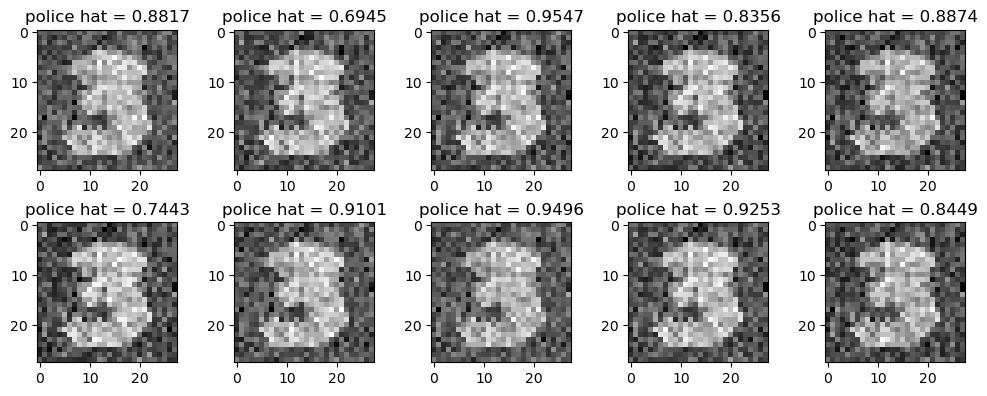

In [251]:
fig,ax = plt.subplots(2,5,figsize=(10,4))
k = 0 
for i in range(2):
    for j in range(5):
        ax[i][j].imshow(X_fake[k].reshape(28,28).data,cmap="gray")
        ax[i][j].set_title(f"police hat = {yhat_fake[k].item():.4f}")
        k = k+1 
fig.tight_layout()

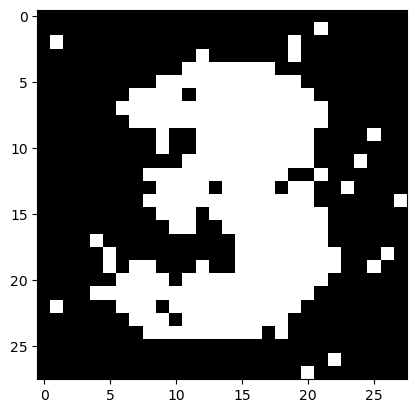

In [260]:
my_noise = torch.tensor([1,222222222222222,2222222222,2222222222222222]).float()
plt.imshow(net_faker(my_noise).data.reshape(28,28),cmap="gray")

In [241]:
yhat_fake > 0.5 # yhat_fake > 0.5 가 True 라는건 위조지폐라는게 걸렸다는 의미. 잘 속였다!

tensor([[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]])

In [242]:
((yhat_fake> 0.5)==(y_real)).float().mean() # 사기에 성공한 비율, faker가 만든 가짜 이미지를 경찰이 진짜라고 잘못 생각한 비율 , 가짜면 1 진짜면 0

tensor(1.)

In [243]:
((yhat_fake< 0.5)==(y_real)).float().mean() # 사기에 실패한 비율, faker가 만든 가짜 이미지를 경찰이 가짜라고 맞춘 비율

tensor(0.)

`-` 위조범의 실력향상을 감상해보자. 

## G. 경쟁학습

> 두 적대적인 네트워크를 경쟁시키자!
- GAN은 경찰과 도둑이 서로 학습의 속도가 비슷해야 한다.. (단점) , 이를 해결하기 위해선 Cycle Gan이 필요

In [ ]:
torch.manual_seed(43052)
net_police = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(in_features=784,out_features=30),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=30,out_features=1),
    torch.nn.Sigmoid()
)
net_faker = torch.nn.Sequential(
    torch.nn.Linear(in_features=4, out_features=64), # (n,4) -> (n,64) 
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=64, out_features=64), # (n,64) -> (n,64)   
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=64, out_features=784), # (n,64) -> (n,784) 
    torch.nn.Sigmoid(), 
    Reshape2828()
)
bce = torch.nn.BCELoss()
optimizr_police = torch.optim.Adam(net_police.parameters(),lr=0.001,betas=(0.5,0.999))
optimizr_faker = torch.optim.Adam(net_faker.parameters(),lr=0.0002,betas=(0.5,0.999))

In [310]:
class Reshape2828(torch.nn.Module):
    def __init__(self):
        super().__init__()
    def forward(self,X):
        return X.reshape(-1,1,28,28)
torch.manual_seed(43052)
net_police = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784,30),
    torch.nn.ReLU(),
    torch.nn.Linear(30,1),
    torch.nn.Sigmoid()
)
net_faker=torch.nn.Sequential(
    torch.nn.Linear(4,64),
    torch.nn.ReLU(),
    torch.nn.Linear(64,64),
    torch.nn.ReLU(),
    torch.nn.Linear(64,784),
    torch.nn.Sigmoid(), # 이미지 픽셀들 값을 0~1 사이로 눌러주기 위해
    Reshape2828()
)

optimizr_police = torch.optim.Adam(net_police.parameters(),lr=0.001,betas=(0.5,0.999))
optimizr_faker = torch.optim.Adam(net_faker.parameters(),lr=0.0002,betas=(0.5,0.999))
bce = torch.nn.BCELoss()

X_real = torch.stack([torchvision.io.read_image(str(l)) for l in (path/'training/3').ls()],axis=0)/255
y_real = torch.tensor([0.0]*6131).float().reshape(-1,1)
y_fake = torch.tensor([1.0]*6131).float().reshape(-1,1)


X_fake = net_faker(Noise).data
yhat_fake = net_police(X_fake)
yhat_real = net_police(X_real)

for epoc in range(100):
    Noise = torch.randn(6131,4)
    # X_fake = net_faker(Noise)             # 매우 중요! : 이렇게 해버리면 학습이 안 됨 
    X_fake = net_faker(Noise).data          # 매우 중요! : net_police 를 훈련하는 과정이므로,  net_faker(Noise) 의 미분값은 필요 없어서 net_faker(Noise).data로 사용해야만 한다.

    ###### police ######
    # step 1
    yhat_real = net_police(X_real)
    yhat_fake = net_police(X_fake)
    # step 2
    loss_police = bce(yhat_fake,y_fake) + bce(yhat_real,y_real)
    # step 3
    loss_police.backward() 
    # step 4
    optimizr_police.step()
    optimizr_police.zero_grad()
    ###### police ######
    
    
    ###### faker ######
    # X_fake = net_faker(Noise).data        # 매우 중요! : 이렇게 해버리면 학습이 안 됨 
    X_fake = net_faker(Noise)               # 매우 중요! : net_fake 를 훈련하는 과정이므로,  net_faker(Noise) 의 미분값은 필요 하므로 net_faker(Noise) 그대로 사용해야만 한다.
    yhat_fake = net_police(X_fake)  

    loss_faker = bce(net_police(X_fake),y_real)
    loss_faker.backward()
    optimizr_faker.step()
    optimizr_faker.zero_grad()
    ###### faker ######

In [287]:
# for epoc in range(1000):
#     # net_police 을 훈련
#     Noise = torch.randn(6131,4) 
#     X_fake = net_faker(Noise).data # net_faker에 대한 미분꼬리표는 여기선 필요없으므로 .data 만을 이용
#     ## step1 
#     yhat_real = net_police(X_real)
#     yhat_fake = net_police(X_fake)
#     ## step2 
#     loss_police = bce(yhat_real,y_real) + bce(yhat_fake,y_fake)
#     ## step3 
#     loss_police.backward()
#     ## step4 
#     optimizr_police.step()
#     optimizr_police.zero_grad()
#     # net_faker 를 훈련
#     ## step1 
#     Noise = torch.randn(6131,4) 
#     X_fake = net_faker(Noise)
#     ## step2 
#     yhat_fake = net_police(X_fake)
#     loss_faker = bce(yhat_fake,y_real) 
#     ## step3
#     loss_faker.backward()
#     ## step4 
#     optimizr_faker.step()
#     optimizr_faker.zero_grad()

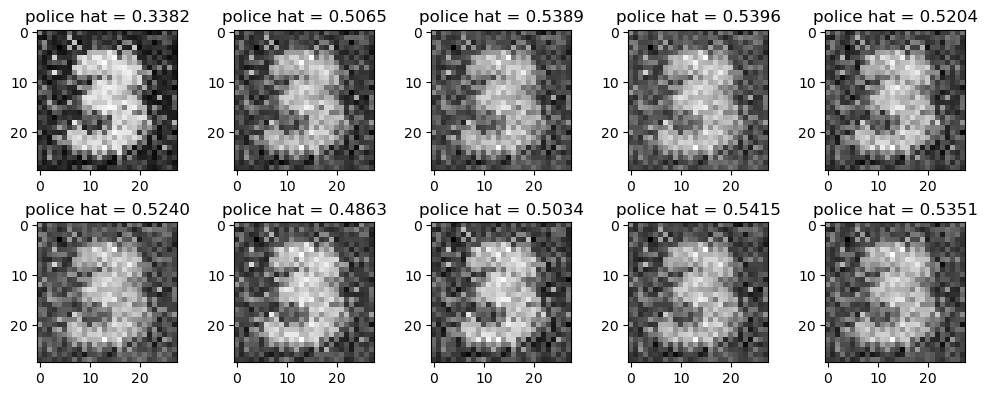

In [311]:
fig,ax = plt.subplots(2,5,figsize=(10,4))
k = 0 
for i in range(2):
    for j in range(5):
        ax[i][j].imshow(X_fake[k].reshape(28,28).data,cmap="gray")
        ax[i][j].set_title(f"police hat = {yhat_fake[k].item():.4f}")
        k = k+1 
fig.tight_layout()

CUDA 사용하여 학습 30000회

In [313]:

# CUDA 사용 가능한지 확인
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# 임의의 시드 설정
torch.manual_seed(43052)

# 모델 정의
class Reshape2828(torch.nn.Module):
    def forward(self, x):
        return x.view(-1, 28, 28)  # (n, 784) -> (n, 28, 28)

net_police = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(in_features=784, out_features=30),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=30, out_features=1),
    torch.nn.Sigmoid()
).to(device)

net_faker = torch.nn.Sequential(
    torch.nn.Linear(in_features=4, out_features=64),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=64, out_features=64),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=64, out_features=784),
    torch.nn.Sigmoid(),
    Reshape2828()
).to(device)




Using device: cuda:0


In [314]:
# 손실 함수와 옵티마이저
bce = torch.nn.BCELoss().to(device)
optimizr_police = torch.optim.Adam(net_police.parameters(), lr=0.001, betas=(0.5, 0.999))
optimizr_faker = torch.optim.Adam(net_faker.parameters(), lr=0.0002, betas=(0.5, 0.999))

for epoc in range(30000):
    # net_police 훈련
    Noise = torch.randn(6131, 4).to(device) 
    X_fake = net_faker(Noise).data  # .detach() 사용하여 불필요한 그래디언트 추적 방지
    yhat_real = net_police(X_real.to(device))
    yhat_fake = net_police(X_fake)
    loss_police = bce(yhat_real, y_real.to(device)) + bce(yhat_fake, y_fake.to(device))
    loss_police.backward()
    optimizr_police.step()
    optimizr_police.zero_grad()

    # net_faker 훈련
    Noise = torch.randn(6131, 4).to(device)
    X_fake = net_faker(Noise)
    yhat_fake = net_police(X_fake)
    loss_faker = bce(yhat_fake, y_real.to(device))
    loss_faker.backward()
    optimizr_faker.step()
    optimizr_faker.zero_grad()

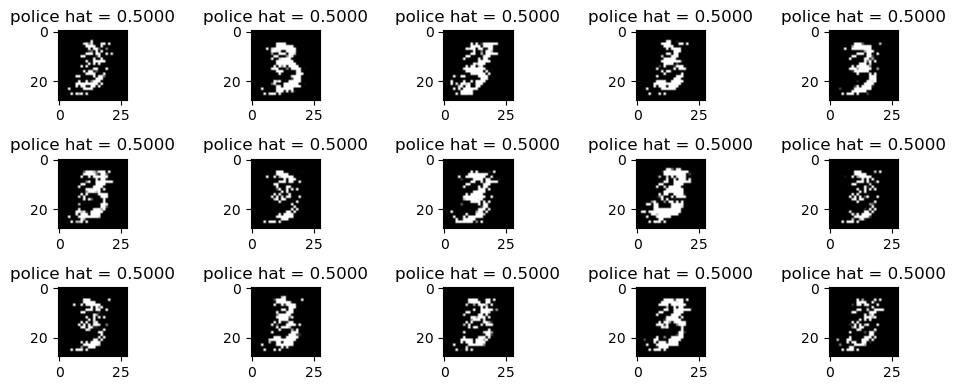

In [315]:
fig,ax = plt.subplots(3,5,figsize=(10,4))
k = 0 
for i in range(3):
    for j in range(5):
        ax[i][j].imshow(X_fake[k].to("cpu").reshape(28,28).data,cmap="gray")
        ax[i][j].set_title(f"police hat = {yhat_fake[k].item():.4f}")
        k = k+1 
fig.tight_layout()

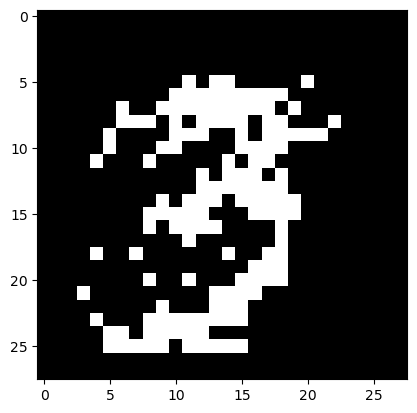

In [329]:
my_noise = torch.tensor([0,111111111111111,111110,0]).float().to(device)
plt.imshow(net_faker(my_noise).data.reshape(28,28).to("cpu"),cmap="gray")

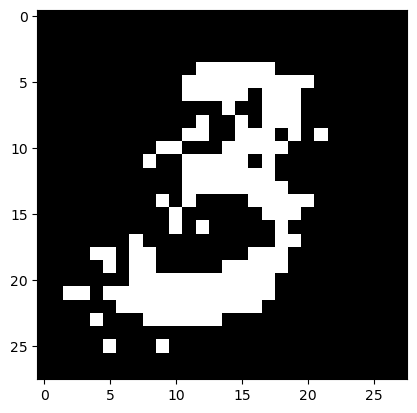

In [328]:
my_noise = torch.tensor([111111111111111110,0,0,0]).float().to(device)
plt.imshow(net_faker(my_noise).data.reshape(28,28).to("cpu"),cmap="gray")

CUDA 사용하여 학습 10000회

In [ ]:

# CUDA 사용 가능한지 확인
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# 임의의 시드 설정
torch.manual_seed(43052)

# 모델 정의
class Reshape2828(torch.nn.Module):
    def forward(self, x):
        return x.view(-1, 28, 28)  # (n, 784) -> (n, 28, 28)

net_police = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(in_features=784, out_features=30),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=30, out_features=1),
    torch.nn.Sigmoid()
).to(device)

net_faker = torch.nn.Sequential(
    torch.nn.Linear(in_features=4, out_features=64),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=64, out_features=64),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=64, out_features=784),
    torch.nn.Sigmoid(),
    Reshape2828()
).to(device)




In [43]:
# 손실 함수와 옵티마이저
bce = torch.nn.BCELoss().to(device)
optimizr_police = torch.optim.Adam(net_police.parameters(), lr=0.001, betas=(0.5, 0.999))
optimizr_faker = torch.optim.Adam(net_faker.parameters(), lr=0.0002, betas=(0.5, 0.999))

for epoc in range(10000):
    # net_police 훈련
    Noise = torch.randn(6131, 4).to(device) 
    X_fake = net_faker(Noise).detach()  # .detach() 사용하여 불필요한 그래디언트 추적 방지
    yhat_real = net_police(X_real.to(device))
    yhat_fake = net_police(X_fake)
    loss_police = bce(yhat_real, y_real.to(device)) + bce(yhat_fake, y_fake.to(device))
    loss_police.backward()
    optimizr_police.step()
    optimizr_police.zero_grad()

    # net_faker 훈련
    Noise = torch.randn(6131, 4).to(device)
    X_fake = net_faker(Noise)
    yhat_fake = net_police(X_fake)
    loss_faker = bce(yhat_fake, y_real.to(device))
    loss_faker.backward()
    optimizr_faker.step()
    optimizr_faker.zero_grad()

In [ ]:
fig,ax = plt.subplots(3,5,figsize=(10,4))
k = 0 
for i in range(3):
    for j in range(5):
        ax[i][j].imshow(X_fake[k].to("cpu").reshape(28,28).data,cmap="gray")
        ax[i][j].set_title(f"police hat = {yhat_fake[k].item():.4f}")
        k = k+1 
fig.tight_layout()

CUDA 사용하여 학습 1000회

In [ ]:

# CUDA 사용 가능한지 확인
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# 임의의 시드 설정
torch.manual_seed(43052)

# 모델 정의
class Reshape2828(torch.nn.Module):
    def forward(self, x):
        return x.view(-1, 28, 28)  # (n, 784) -> (n, 28, 28)

net_police = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(in_features=784, out_features=30),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=30, out_features=1),
    torch.nn.Sigmoid()
).to(device)

net_faker = torch.nn.Sequential(
    torch.nn.Linear(in_features=4, out_features=64),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=64, out_features=64),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=64, out_features=784),
    torch.nn.Sigmoid(),
    Reshape2828()
).to(device)


# 손실 함수와 옵티마이저
bce = torch.nn.BCELoss().to(device)
optimizr_police = torch.optim.Adam(net_police.parameters(), lr=0.001, betas=(0.5, 0.999))
optimizr_faker = torch.optim.Adam(net_faker.parameters(), lr=0.0002, betas=(0.5, 0.999))

In [46]:
for epoc in range(1000):
    # net_police 훈련
    Noise = torch.randn(6131, 4).to(device) 
    X_fake = net_faker(Noise).detach()  # .detach() 사용하여 불필요한 그래디언트 추적 방지
    yhat_real = net_police(X_real.to(device))
    yhat_fake = net_police(X_fake)
    loss_police = bce(yhat_real, y_real.to(device)) + bce(yhat_fake, y_fake.to(device))
    loss_police.backward()
    optimizr_police.step()
    optimizr_police.zero_grad()

    # net_faker 훈련
    Noise = torch.randn(6131, 4).to(device)
    X_fake = net_faker(Noise)
    yhat_fake = net_police(X_fake)
    loss_faker = bce(yhat_fake, y_real.to(device))
    loss_faker.backward()
    optimizr_faker.step()
    optimizr_faker.zero_grad()

In [ ]:
fig,ax = plt.subplots(3,5,figsize=(10,10))
k = 0 
for i in range(3):
    for j in range(5):
        ax[i][j].imshow(X_fake[k].to("cpu").reshape(28,28).data,cmap="gray")
        ax[i][j].set_title(f"police hat = {yhat_fake[k].item():.4f}")
        k = k+1 
fig.tight_layout()

# 5. 초기 GAN의 한계점 

`-` 두 네트워크의 균형이 매우 중요함 -- 균형이 깨지는 순간 학습은 실패함

`-` 생성되는 이미지의 다양성이 부족한 경우가 발생함. (mode collapse)